In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot
%matplotlib inline

In [2]:
dict_data = {}

#for year in range(2015, 2020):
dict_data[2015]= pd.read_csv(r'C:\Users\shrey\Desktop\7th Sem\BDA\Mini Project\2015.csv')
dict_data[2016]= pd.read_csv(r'C:\Users\shrey\Desktop\7th Sem\BDA\Mini Project\2016.csv')
dict_data[2017]= pd.read_csv(r'C:\Users\shrey\Desktop\7th Sem\BDA\Mini Project\2017.csv')
dict_data[2018]= pd.read_csv(r'C:\Users\shrey\Desktop\7th Sem\BDA\Mini Project\2018.csv')
dict_data[2019]= pd.read_csv(r'C:\Users\shrey\Desktop\7th Sem\BDA\Mini Project\2019.csv')


In [3]:
# We create a DataFrame where we'll store row and col numbers for each year of study
df_dim = pd.DataFrame(['row','col'])
# for each year, store row and col numbers in the DataFrame
for year in range(2015, 2020):
    df_dim = pd.concat([df_dim, pd.DataFrame(dict_data[year].shape, columns=[str(year)])],axis=1)
# set index
df_dim.set_index(0, inplace=True)
df_dim.index.name = None

display(df_dim)

,2015,2016,2017,2018,2019
row,158,157,155,156,156
col,12,13,12,9,9


In [4]:
# We create a DataFrame to store the columns lists for each set.
df_col = pd.DataFrame()
# For each year, store columns in DataFrame
for year in range(2015, 2020):
    df_col = pd.concat([df_col, pd.DataFrame(dict_data[year].columns.tolist(), columns=[str(year)])],axis=1)

display(df_col)

,2015,2016,2017,2018,2019
0,Country,Country,Country,Overall rank,Overall rank
1,Region,Region,Happiness.Rank,Country or region,Country or region
2,Happiness Rank,Happiness Rank,Happiness.Score,Score,Score
3,Happiness Score,Happiness Score,Whisker.high,GDP per capita,GDP per capita
4,Standard Error,Lower Confidence Interval,Whisker.low,Social support,Social support
5,Economy (GDP per Capita),Upper Confidence Interval,Economy..GDP.per.Capita.,Healthy life expectancy,Healthy life expectancy
6,Family,Economy (GDP per Capita),Family,Freedom to make life choices,Freedom to make life choices
7,Health (Life Expectancy),Family,Health..Life.Expectancy.,Generosity,Generosity
8,Freedom,Health (Life Expectancy),Freedom,Perceptions of corruption,Perceptions of corruption
9,Trust (Government Corruption),Freedom,Generosity,NaN,NaN


In [5]:
# 2015 
dict_data[2015].rename(columns={'Happiness Rank': "happiness_rank",  "Happiness Score": "happiness_score", "Economy (GDP per Capita)":"gdp_per_capita", 
                                "Health (Life Expectancy)": "life_expectancy", "Freedom": "freedom", "Generosity": "generosity"}, inplace=True)
# 2016
dict_data[2016].rename(columns={'Happiness Rank': "happiness_rank", "Happiness Score": "happiness_score", "Economy (GDP per Capita)":"gdp_per_capita", 
                                "Health (Life Expectancy)": "life_expectancy", "Freedom": "freedom", "Generosity": "generosity"}, inplace=True)
# 2017
dict_data[2017].rename(columns={'Happiness.Rank': "happiness_rank", "Happiness.Score": "happiness_score", "Economy..GDP.per.Capita.":"gdp_per_capita", 
                                "Health..Life.Expectancy.": "life_expectancy", "Freedom": "freedom", "Generosity": "generosity"}, inplace=True)
# 2018
dict_data[2018].rename(columns={'Overall rank': "happiness_rank", "Score": "happiness_score", "GDP per capita":"gdp_per_capita", 
                                "Healthy life expectancy": "life_expectancy", "Freedom to make life choices": "freedom", "Generosity": "generosity"}, inplace=True)
# 2019
dict_data[2019].rename(columns={'Overall rank': "happiness_rank", "Score": "happiness_score", "GDP per capita":"gdp_per_capita",  
                                "Healthy life expectancy": "life_expectancy", "Freedom to make life choices": "freedom", "Generosity": "generosity"}, inplace=True)

In [6]:
# First, let's store countries values in dict
d_countries = {}
d_countries[2015] = dict_data[2015]['Country'].tolist()
d_countries[2016] = dict_data[2016]['Country'].tolist()
d_countries[2017] = dict_data[2017]['Country'].tolist()
d_countries[2018] = dict_data[2018]['Country or region'].tolist()
d_countries[2019] = dict_data[2019]['Country or region'].tolist()

# Identify the countries that appear in all sets.
l_common_countries = set(d_countries[2015]).intersection(d_countries[2016], d_countries[2017], d_countries[2018], d_countries[2019])
print(str(len(l_common_countries))+" are present in the 5 datasets")

141 are present in the 5 datasets


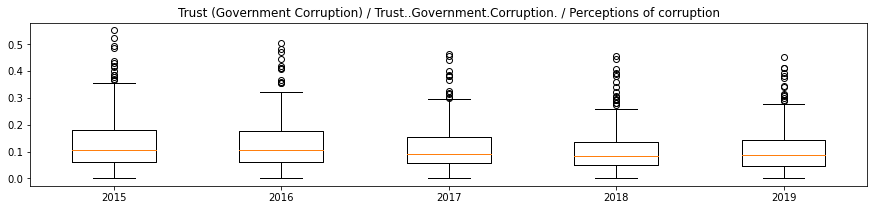

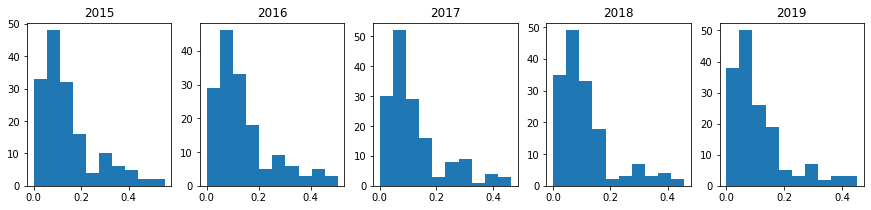

In [7]:
# First, let's store government corruption values in dict
d_gov = {}
d_gov[2015] = dict_data[2015]['Trust (Government Corruption)'].tolist()
d_gov[2016] = dict_data[2016]['Trust (Government Corruption)'].tolist()
d_gov[2017] = dict_data[2017]['Trust..Government.Corruption.'].tolist()
d_gov[2018] = dict_data[2018]['Perceptions of corruption'].fillna(dict_data[2018]['Perceptions of corruption'].median())
d_gov[2019] = dict_data[2019]['Perceptions of corruption']

# Boxplot
pyplot.figure(figsize=(15,3))
pyplot.boxplot([d_gov[2015], d_gov[2016], d_gov[2017], d_gov[2018], d_gov[2019]])
pyplot.xticks([1, 2, 3, 4, 5], ['2015', '2016', '2017','2018','2019'])
pyplot.title('Trust (Government Corruption) / Trust..Government.Corruption. / Perceptions of corruption')
pyplot.show()

# Histogram
pyplot.figure(figsize=(15,3))
i = 151 # subplot initial position
for year in range(2015, 2020):
    pyplot.subplot(i)
    pyplot.hist(d_gov[year])
    pyplot.title(str(year))
    i+=1
pyplot.show()


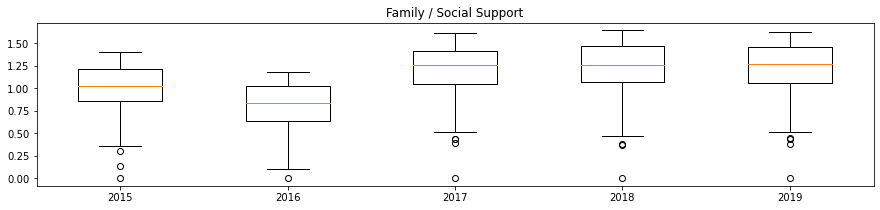

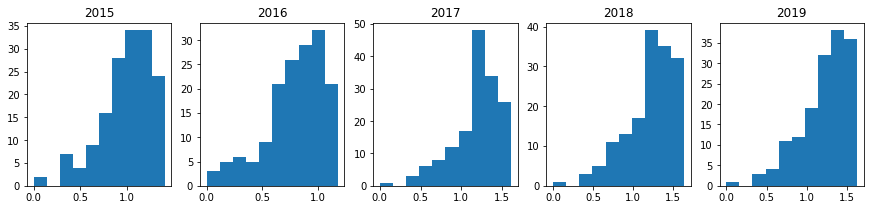

In [8]:

# First, let's store government corruption values in dict
d_gov = {}
d_gov[2015] = dict_data[2015]['Family'].tolist()
d_gov[2016] = dict_data[2016]['Family'].tolist()
d_gov[2017] = dict_data[2017]['Family'].tolist()
d_gov[2018] = dict_data[2018]['Social support']
d_gov[2019] = dict_data[2019]['Social support']

# Boxplot
pyplot.figure(figsize=(15,3))
pyplot.boxplot([d_gov[2015], d_gov[2016], d_gov[2017], d_gov[2018], d_gov[2019]])
pyplot.xticks([1, 2, 3, 4, 5], ['2015', '2016', '2017','2018','2019'])
pyplot.title('Family / Social Support')
pyplot.show()

# Histogram
pyplot.figure(figsize=(15,3))
i = 151 # subplot initial position
for year in range(2015, 2020):
    pyplot.subplot(i)
    pyplot.hist(d_gov[year])
    pyplot.title(str(year))
    i+=1
pyplot.show()

# => We can observe that the distribution is very similar between 2017 and (2018-2019). 

In [9]:
# country
dict_data[2015].rename(columns={'Country': "country"}, inplace=True)
dict_data[2016].rename(columns={'Country': "country"}, inplace=True)
dict_data[2017].rename(columns={'Country': "country"}, inplace=True)
dict_data[2018].rename(columns={'Country or region': "country"}, inplace=True)
dict_data[2019].rename(columns={'Country or region': "country"}, inplace=True)

# corruption_perception
dict_data[2015].rename(columns={'Trust (Government Corruption)': "corruption_perception"}, inplace=True)
dict_data[2016].rename(columns={'Trust (Government Corruption)': "corruption_perception"}, inplace=True)
dict_data[2017].rename(columns={'Trust..Government.Corruption.': "corruption_perception"}, inplace=True)
dict_data[2018].rename(columns={'Perceptions of corruption': "corruption_perception"}, inplace=True)
dict_data[2019].rename(columns={'Perceptions of corruption': "corruption_perception"}, inplace=True)

# social_support
dict_data[2015].rename(columns={'Family': "social_support"}, inplace=True)
dict_data[2016].rename(columns={'Family': "social_support"}, inplace=True)
dict_data[2017].rename(columns={'Family': "social_support"}, inplace=True)
dict_data[2018].rename(columns={'Social support': "social_support"}, inplace=True)
dict_data[2019].rename(columns={'Social support': "social_support"}, inplace=True)

In [10]:
# 2015, 2016, 2017: Dystopia Residual / Dystopia.Residual
# 2015 : Standard error
# 2016 : Lower Confidence Interval + Upper Confidence Interval
# 2017 : Whisker.high + Whisker.low
dict_data[2015] = dict_data[2015].drop(columns=['Dystopia Residual','Standard Error'])
dict_data[2016] = dict_data[2016].drop(columns=['Dystopia Residual','Lower Confidence Interval','Upper Confidence Interval'])
dict_data[2017] = dict_data[2017].drop(columns=['Dystopia.Residual','Whisker.high','Whisker.low'])


In [11]:
# For each set, we only keep the 141 common countries previously identified
for year in range(2015, 2020):
    df = dict_data[year]
    df = df[df['country'].isin(l_common_countries)]
    dict_data[year] = df
    
# We could look closer to the name and try to find same countries with different orthographes but we won't do that here.

In [12]:
for year in range(2015, 2020):
    df = dict_data[year].sort_values(by='happiness_rank')
    df['happiness_rank'] = np.arange(len(df))+1
    dict_data[year] = df
    
print("Done !")

Done !


In [13]:
# Rename Region in respect of naming conventions
dict_data[2015].rename(columns={'Region':'region'}, inplace=True)
dict_data[2016].rename(columns={'Region':'region'}, inplace=True)

# add region information in 2017-2019 sets
df_country_reg = dict_data[2015][['country','region']].copy()
for year in range(2017,2020):
    dict_data[year] = pd.merge(dict_data[year], df_country_reg, on='country', how='inner')
    print(dict_data[year].shape)

(141, 10)
(141, 10)
(141, 10)


In [14]:
# for each set, create a new column "year" containing the year of study
for year in range(2015,2020):
    if 'year' not in dict_data[year].columns.tolist():
        dict_data[year]['year']=year

In [15]:
# Same as we did earlier
df_col = pd.DataFrame()

for year in range(2015, 2020):
    dict_data[year] = dict_data[year].reindex(sorted(dict_data[year].columns), axis=1)
    df_col = pd.concat([df_col, pd.DataFrame(dict_data[year].columns.tolist(), columns=[str(year)])],axis=1)

display(df_col)

,2015,2016,2017,2018,2019
0,corruption_perception,corruption_perception,corruption_perception,corruption_perception,corruption_perception
1,country,country,country,country,country
2,freedom,freedom,freedom,freedom,freedom
3,gdp_per_capita,gdp_per_capita,gdp_per_capita,gdp_per_capita,gdp_per_capita
4,generosity,generosity,generosity,generosity,generosity
5,happiness_rank,happiness_rank,happiness_rank,happiness_rank,happiness_rank
6,happiness_score,happiness_score,happiness_score,happiness_score,happiness_score
7,life_expectancy,life_expectancy,life_expectancy,life_expectancy,life_expectancy
8,region,region,region,region,region
9,social_support,social_support,social_support,social_support,social_support


In [16]:
# We create our gathering dataset
df = pd.DataFrame()

# we store each set in it
for year in range(2015,2020):
    df = pd.concat([df, dict_data[year]])

print("gathering dataset dimensions:",df.shape)
display(pd.DataFrame({"columns":df.columns.tolist()}))

gathering dataset dimensions: (705, 11)


,columns
0,corruption_perception
1,country
2,freedom
3,gdp_per_capita
4,generosity
5,happiness_rank
6,happiness_score
7,life_expectancy
8,region
9,social_support


In [17]:
df.dtypes

corruption_perception    float64
country                   object
freedom                  float64
gdp_per_capita           float64
generosity               float64
happiness_rank             int32
happiness_score          float64
life_expectancy          float64
region                    object
social_support           float64
year                       int64
dtype: object

In [18]:
# We define a function to compute the min and max of a column
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# We apply our function to numerica data
df._get_numeric_data().apply(minMax)

,corruption_perception,freedom,gdp_per_capita,generosity,happiness_rank,happiness_score,life_expectancy,social_support,year
min,0.00000,0.000,0.000,0.000000,1,2.839,0.000,0.000,2015
max,0.55191,0.724,2.096,0.838075,141,7.769,1.141,1.644,2019


In [19]:
df[['country','happiness_score']].isna().sum()

country            0
happiness_score    0
dtype: int64

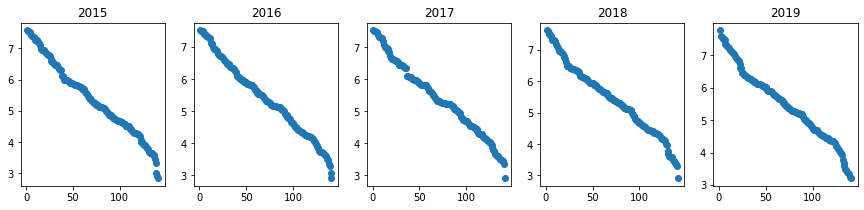

In [20]:
# Scatter plot
pyplot.figure(figsize=(15,3))
i = 151 # subplot initial position
for year in range(2015, 2020):
    pyplot.subplot(i)
    df_tmp = df[df['year']==year]
    pyplot.scatter(x=df_tmp['happiness_rank'], y=df_tmp['happiness_score'])
    pyplot.title(str(year))
    i+=1
pyplot.show()

In [21]:
# Let's plot the features that contains at least 1 missing values
na_df = pd.DataFrame({'missing_values':df.isna().sum()})

display(na_df[na_df['missing_values']>0])

# let's plot the lines concerned by the missing value
display(df[df['corruption_perception'].isna()])

,missing_values
corruption_perception,1


,corruption_perception,country,freedom,gdp_per_capita,generosity,happiness_rank,happiness_score,life_expectancy,region,social_support,year
19,NaN,United Arab Emirates,0.284,2.096,0.186,20,6.774,0.67,Middle East and Northern Africa,0.776,2018


In [22]:
# get corruption_perception values for the year 2017
df_corrupt_2017 = dict_data[2017][['country', 'corruption_perception']].rename(columns={'corruption_perception':'corr_2017'})

# merge
df_temp =pd.merge(df, df_corrupt_2017, on='country')

# replace value
df_temp['corruption_perception'] = df_temp.apply(
    lambda row: row['corr_2017'] if np.isnan(row['corruption_perception']) else row['corruption_perception'],
    axis=1
)

df = df_temp.drop(['corr_2017'], axis=1)

print("Done!")

Done!


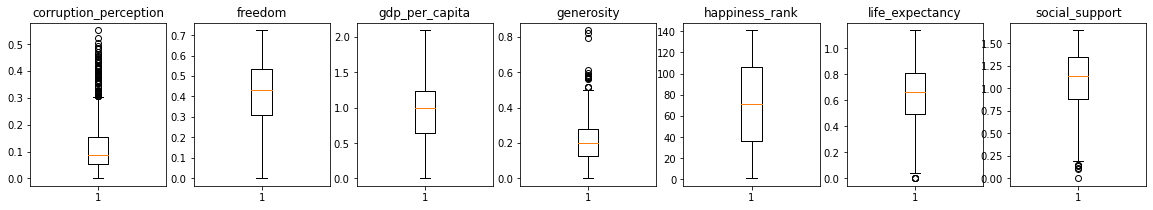

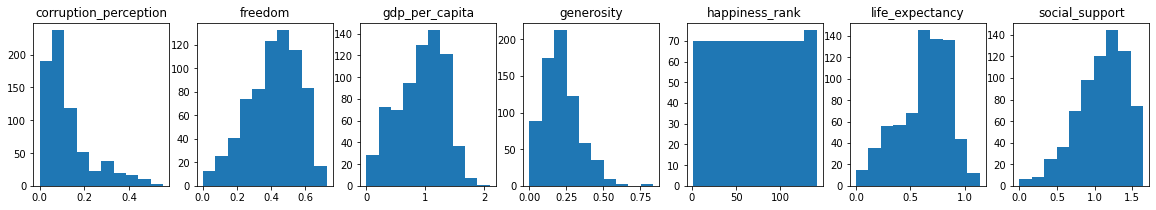

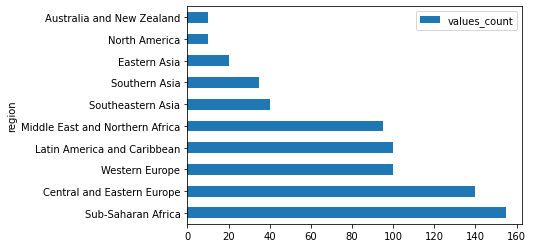

In [23]:
#boxplot
pyplot.figure(figsize=(20,3))

i=171
for col in['corruption_perception','freedom', 'gdp_per_capita', 'generosity', 'happiness_rank', 'life_expectancy', 'social_support']:
    pyplot.subplot(i)
    pyplot.boxplot(df[col])
    pyplot.title(col)
    i+=1
pyplot.show()

pyplot.figure(figsize=(20,3))
j = 171
for col in['corruption_perception','freedom', 'gdp_per_capita', 'generosity', 'happiness_rank', 'life_expectancy', 'social_support']:
    pyplot.subplot(j)
    pyplot.hist(df[col])
    pyplot.title(col)
    j+=1
pyplot.show()

#pyplot.figure(figsize=(20,3))
pd.DataFrame(df['region'].value_counts()).reset_index().rename(columns={'index':'region', 'region':'values_count'}).plot.barh(x='region',y='values_count')
pyplot.show()

In [24]:
# We define a function that returns outliers thresholds using IQR
def outliers_th(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    
    return lower_range, upper_range

lower_corrupt, upper_corrupt = outliers_th(df['corruption_perception'])
lower_gen, upper_gen = outliers_th(df['generosity'])


# number of outliers for corruption_perception
print("number of corruption_perception outliers: "+str((df['corruption_perception']>upper_corrupt).sum()))

# number of outliers for generosity
print("number of generosity outliers: "+str((df['generosity']>upper_gen).sum()))

# replace values
df['corruption_perception'] = df.apply(
    lambda row: upper_corrupt if row['corruption_perception']>upper_corrupt else row['corruption_perception'],
    axis=1)

df['generosity'] = df.apply(
    lambda row: upper_gen if row['generosity']>upper_gen else row['generosity'],
    axis=1)

print("\n==> outliers values have been replace thanks to IQR method")

number of corruption_perception outliers: 67
number of generosity outliers: 15

==> outliers values have been replace thanks to IQR method


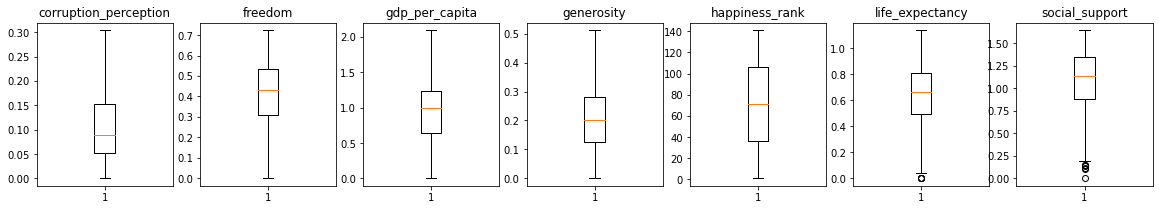

In [25]:
#boxplot
pyplot.figure(figsize=(20,3))

i=171
for col in['corruption_perception','freedom', 'gdp_per_capita', 'generosity', 'happiness_rank', 'life_expectancy', 'social_support']:
    pyplot.subplot(i)
    pyplot.boxplot(df[col])
    pyplot.title(col)
    i+=1
pyplot.show()

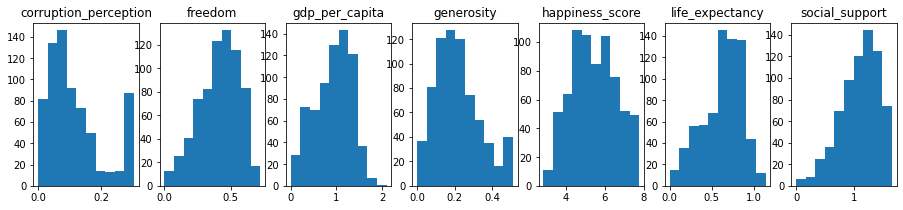

`
 Regions:


Sub-Saharan Africa                 155
Central and Eastern Europe         140
Western Europe                     100
Latin America and Caribbean        100
Middle East and Northern Africa     95
Southeastern Asia                   40
Southern Asia                       35
Eastern Asia                        20
North America                       10
Australia and New Zealand           10
Name: region, dtype: int64

In [26]:
pyplot.figure(figsize=(20,3))
j = 191
for col in [col for col in df.columns.tolist() if col not in ['country','happiness_rank','year','region']]:
    pyplot.subplot(j)
    pyplot.hist(df[col])
    pyplot.title(col)
    j+=1
pyplot.show()

print("`\n Regions:")
display(df["region"].value_counts())

In [27]:
# Rescale
df_norm = df.copy()
for col in ['corruption_perception', 'freedom', 'gdp_per_capita', 
            'generosity', 'happiness_score', 'life_expectancy', 'social_support']:
        
        df_norm[col] = (df_norm[col]-df_norm[col].min())/(df_norm[col].max()-df_norm[col].min())*100


In [28]:
print("Our final datasets contains "+str(df.shape[0])+' observations and '+str(df.shape[1])+' columns')
display(pd.DataFrame({"Features":df.columns.tolist()}))
df.to_csv(r'C:\Users\shrey\Desktop\7th Sem\BDA\Mini Project\data_clean.csv', index=False)
df_norm.to_csv(r'C:\Users\shrey\Desktop\7th Sem\BDA\Mini Project\data_clean_norm.csv', index=False)


Our final datasets contains 705 observations and 11 columns


,Features
0,corruption_perception
1,country
2,freedom
3,gdp_per_capita
4,generosity
5,happiness_rank
6,happiness_score
7,life_expectancy
8,region
9,social_support


In [29]:
df_test = pd.read_csv(r'C:\Users\shrey\Desktop\7th Sem\BDA\Mini Project\data_clean.csv')
print(df.shape)
display(df.sample(10))

(705, 11)


,corruption_perception,country,freedom,gdp_per_capita,generosity,happiness_rank,happiness_score,life_expectancy,region,social_support,year
204,0.014000,Slovakia,0.334000,1.246000,0.121000,37,6.198,0.881000,Central and Eastern Europe,1.504000,2019
649,0.147000,Tanzania,0.417000,0.476000,0.276000,140,3.231,0.499000,Sub-Saharan Africa,0.885000,2019
351,0.047620,Kyrgyzstan,0.402120,0.560440,0.384320,77,5.185,0.554490,Central and Eastern Europe,0.954340,2016
534,0.053000,Congo (Kinshasa),0.269000,0.094000,0.212000,117,4.418,0.357000,Sub-Saharan Africa,1.125000,2019
223,0.123000,Bahrain,0.594000,1.338000,0.243000,41,6.105,0.698000,Middle East and Northern Africa,1.366000,2018
49,0.290000,Australia,0.557000,1.372000,0.332000,11,7.228,1.036000,Australia and New Zealand,1.548000,2019
442,0.032902,Mongolia,0.394144,1.027236,0.338464,93,4.955,0.557783,Eastern Asia,1.493011,2017
406,0.015210,Portugal,0.447270,1.276070,0.116910,86,5.123,0.793630,Western Europe,0.943670,2016
656,0.049520,Chad,0.128070,0.422140,0.186670,128,3.763,0.038240,Sub-Saharan Africa,0.631780,2016
105,0.110690,Venezuela,0.429080,1.044240,0.058410,22,6.810,0.720520,Latin America and Caribbean,1.255960,2015


In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [31]:
df_test = pd.read_csv(r'C:\Users\shrey\Desktop\7th Sem\BDA\Mini Project\data_clean_norm.csv')
print(df.shape)
display(df.sample(5))

(705, 11)


,corruption_perception,country,freedom,gdp_per_capita,generosity,happiness_rank,happiness_score,life_expectancy,region,social_support,year
285,0.024300,Croatia,0.258830,1.082540,0.05444,58,5.759,0.78805,Central and Eastern Europe,0.796240,2015
208,0.150000,Japan,0.553000,1.294000,0.07900,51,5.915,0.98800,Eastern Asia,1.462000,2018
377,0.119803,Jordan,0.418421,0.991012,0.17217,69,5.336,0.60459,Middle East and Northern Africa,1.239089,2017
376,0.132970,Jordan,0.360230,0.996730,0.14262,72,5.303,0.60712,Middle East and Northern Africa,0.862160,2016
84,0.304316,Luxembourg,0.526000,1.609000,0.19400,14,7.090,1.01200,Western Europe,1.479000,2019


In [32]:
display(pd.DataFrame({"numerical columns":df._get_numeric_data().columns.tolist()}))

# list containing the 6 factors
l_factors = ['life_expectancy', 'gdp_per_capita', 'social_support', 
             'freedom','generosity', 'corruption_perception']

,numerical columns
0,corruption_perception
1,freedom
2,gdp_per_capita
3,generosity
4,happiness_rank
5,happiness_score
6,life_expectancy
7,social_support
8,year


In [33]:
def num_analysis(df, col):
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    """
    Gives gescriptive statistics and plot distribution and boxplot 
    of a numerical variable for each year between 2015 and 2019
    
    Parameters
    -----
    df: DataFrame
        the dataset containing the variable
    col: string
        name of the variable
    """
    # We create a DataFrame where we'll store descriptive statistics for each year
    df_des = pd.DataFrame()
    # for each year, store descriptive statistics
    for year in range(2015, 2020):
        df_year = df[df["year"]==year]
        df_des = pd.concat([df_des, df_year[col].describe()],axis=1)
    # rename columns
    df_des.columns=[str(year) for year in range(2015,2020)]
    # display DataFrame
    display(df_des) 

    # Distribution plot
    #plot = sns.displot(df, col="year", x=col, height=3, aspect=.9, bins=11)
    #plot.set(xticks=range(0,101,25))
    #plt.show()
    
    fig = plt.figure(figsize=(15,3))
    j = 151
    for y in range(2015,2020):
        df_year = df[df["year"]==y]
        plt.subplot(j)
        plt.hist(df_year[col])
        plt.xticks(range(0,100,20))
        j+=1
        plt.title(str(y), y=-0.3)
    fig.suptitle(col+" histogram", fontsize=15)
    plt.show()
    
    # Boxplots
    fig2 = plt.figure(figsize = (15, 3))
    sns.boxplot(x='year', y=col, data=df)
    plt.title(str(y), y=-0.3)
    fig2.suptitle(col+ " boxplot", fontsize=15)
    plt.show()

,2015,2016,2017,2018,2019
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,5.406716,5.397887,5.408291,5.440156,5.485383
std,1.169844,1.159746,1.122669,1.110110,1.096099
min,2.839000,2.905000,2.905000,2.905000,3.203000
25%,4.518000,4.404000,4.535000,4.559000,4.628000
50%,5.286000,5.314000,5.311000,5.472000,5.467000
75%,6.302000,6.355000,6.344000,6.260000,6.199000
max,7.587000,7.526000,7.537000,7.632000,7.769000


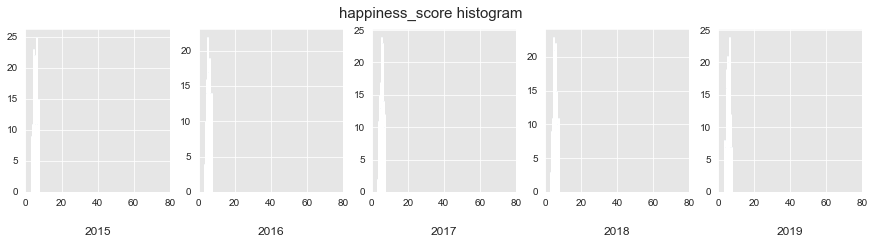

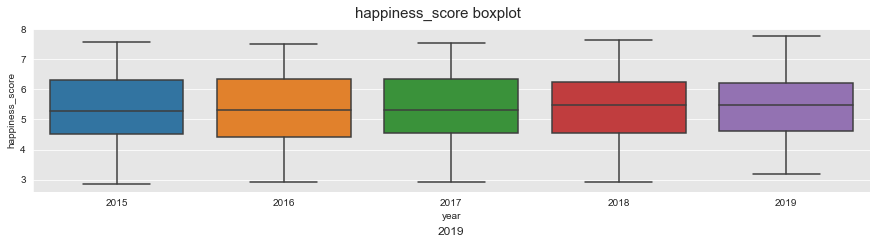

,2015,2016,2017,2018,2019
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.648851,0.567795,0.568714,0.615035,0.746965
std,0.231794,0.222867,0.220529,0.233132,0.219697
min,0.000000,0.000000,0.005565,0.000000,0.192000
25%,0.515290,0.424940,0.429783,0.457000,0.581000
50%,0.708060,0.618040,0.617144,0.669000,0.802000
75%,0.813250,0.729930,0.726798,0.781000,0.884000
max,1.025250,0.947190,0.949492,1.008000,1.141000


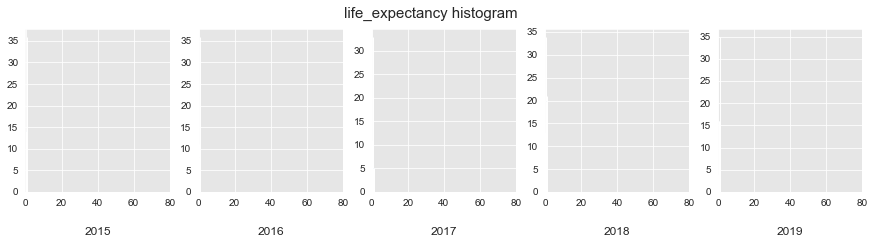

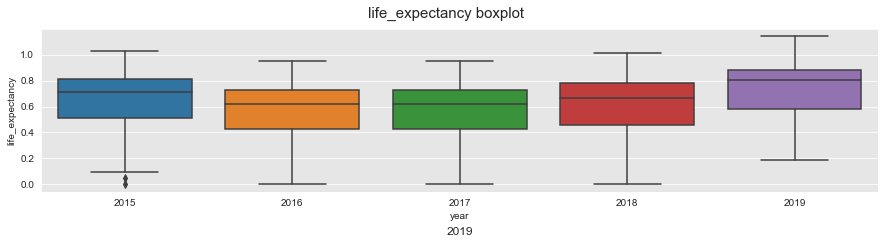

,2015,2016,2017,2018,2019
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.860514,0.963449,1.002182,0.908638,0.928078
std,0.395357,0.407194,0.407749,0.381668,0.381611
min,0.000000,0.056610,0.091623,0.069000,0.046000
25%,0.594480,0.688160,0.726884,0.652000,0.657000
50%,0.920490,1.030320,1.074988,0.975000,0.987000
75%,1.154060,1.276070,1.315175,1.197000,1.237000
max,1.690420,1.824270,1.870766,2.096000,1.684000


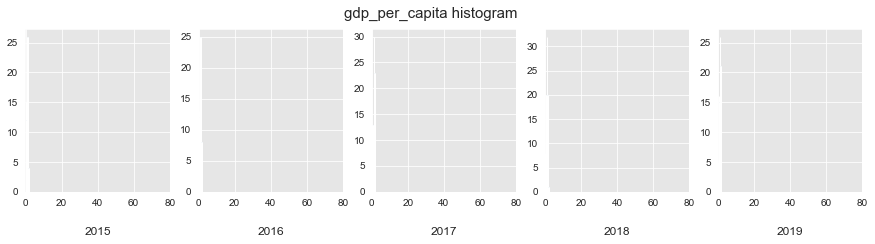

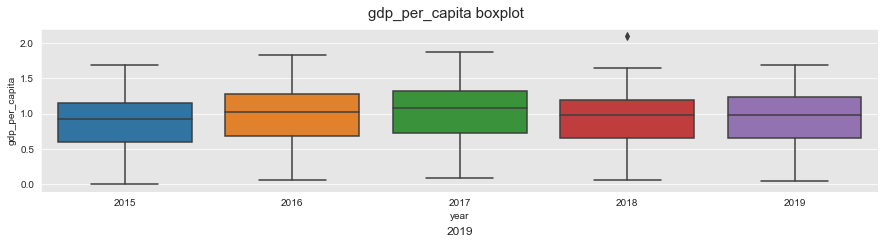

,2015,2016,2017,2018,2019
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,1.000370,0.801773,1.205502,1.229638,1.228574
std,0.271197,0.270313,0.273629,0.289771,0.282676
min,0.139950,0.000000,0.396103,0.372000,0.378000
25%,0.855630,0.641840,1.043280,1.078000,1.098000
50%,1.035160,0.862160,1.259976,1.279000,1.303000
75%,1.227910,1.031430,1.428939,1.469000,1.457000
max,1.402230,1.183260,1.610574,1.644000,1.624000


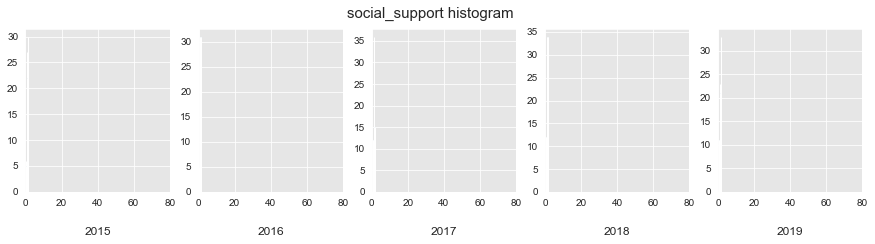

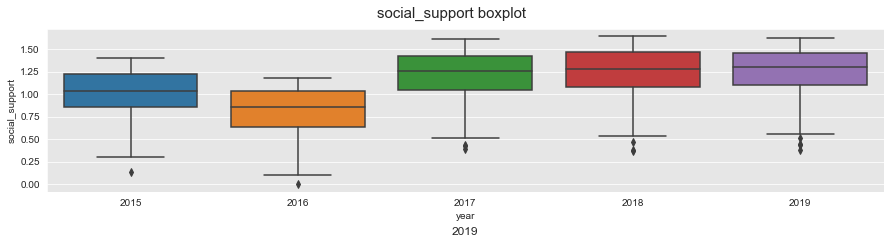

,2015,2016,2017,2018,2019
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.430532,0.371758,0.412903,0.458851,0.395511
std,0.149151,0.141085,0.145071,0.156164,0.142888
min,0.000000,0.043200,0.030370,0.025000,0.000000
25%,0.328780,0.257480,0.306614,0.356000,0.305000
50%,0.434770,0.392370,0.437454,0.481000,0.426000
75%,0.546040,0.473750,0.514492,0.580000,0.508000
max,0.669730,0.608480,0.658249,0.724000,0.631000


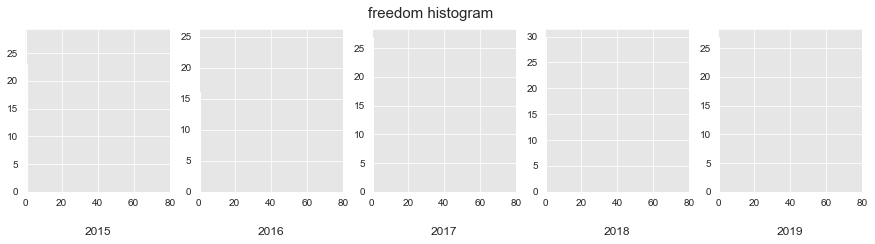

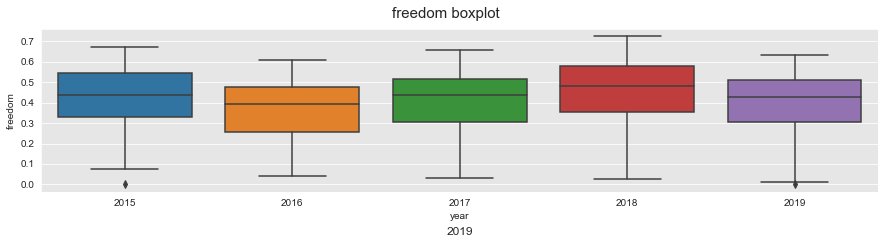

,2015,2016,2017,2018,2019
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.233255,0.237372,0.243293,0.181220,0.182858
std,0.121285,0.125969,0.127740,0.099645,0.096334
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.140740,0.145270,0.152074,0.106000,0.108000
50%,0.214880,0.216980,0.228674,0.172000,0.175000
75%,0.311050,0.311850,0.326662,0.245000,0.247000
max,0.512000,0.512000,0.512000,0.512000,0.512000


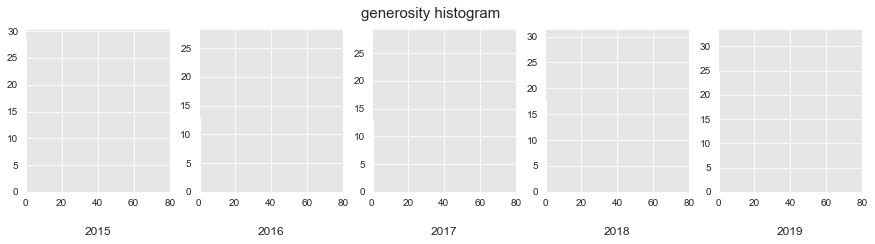

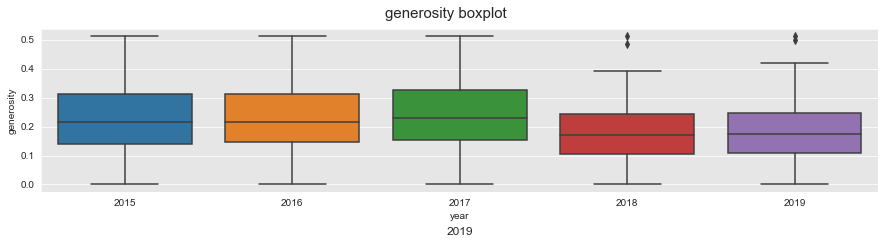

,2015,2016,2017,2018,2019
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.128054,0.126237,0.117088,0.107443,0.104542
std,0.091446,0.090090,0.087667,0.084706,0.082575
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.059890,0.055700,0.056767,0.050000,0.047000
50%,0.105010,0.103390,0.088174,0.082000,0.082000
75%,0.175210,0.174570,0.153066,0.136000,0.140000
max,0.304316,0.304316,0.304316,0.304316,0.304316


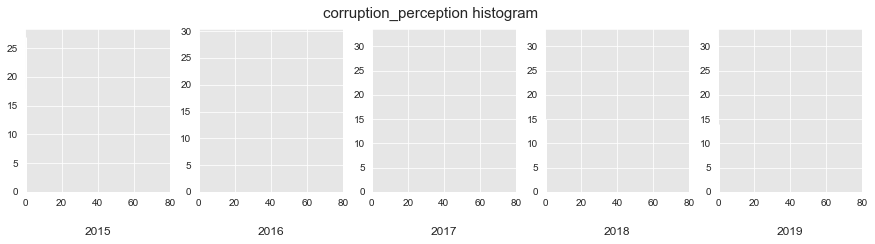

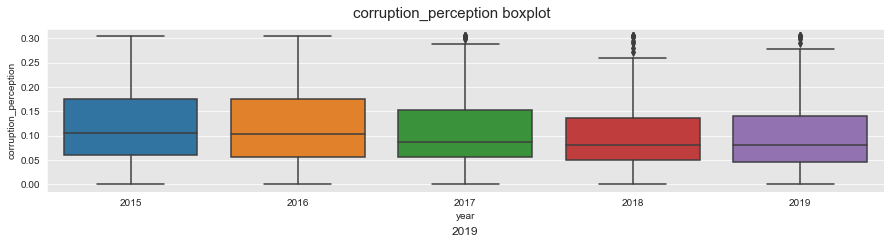

In [34]:
for col in ["happiness_score"]+l_factors:
    num_analysis(df, col)

Sub-Saharan Africa                 22.0%
Central and Eastern Europe         19.9%
Western Europe                     14.2%
Latin America and Caribbean        14.2%
Middle East and Northern Africa    13.5%
Southeastern Asia                   5.7%
Southern Asia                       5.0%
Eastern Asia                        2.8%
North America                       1.4%
Australia and New Zealand           1.4%
Name: region, dtype: object

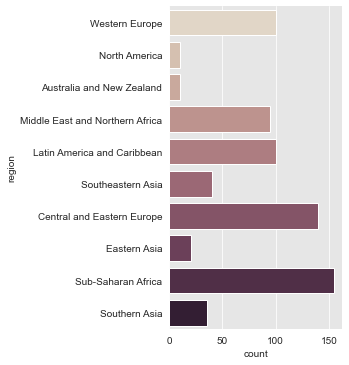

In [35]:
s = df["region"].value_counts(-1)
display(s.map(lambda x: str(round(x*100,1))+"%"))

sns.catplot(y="region", kind="count", palette="ch:.25", data=df)

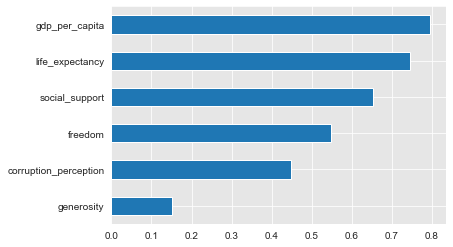

In [36]:
corr_matrix=df[["happiness_score"]+l_factors].corr()

target_corr = corr_matrix["happiness_score"].drop(['happiness_score'])

target_corr.sort_values(ascending=True).plot(kind='barh')

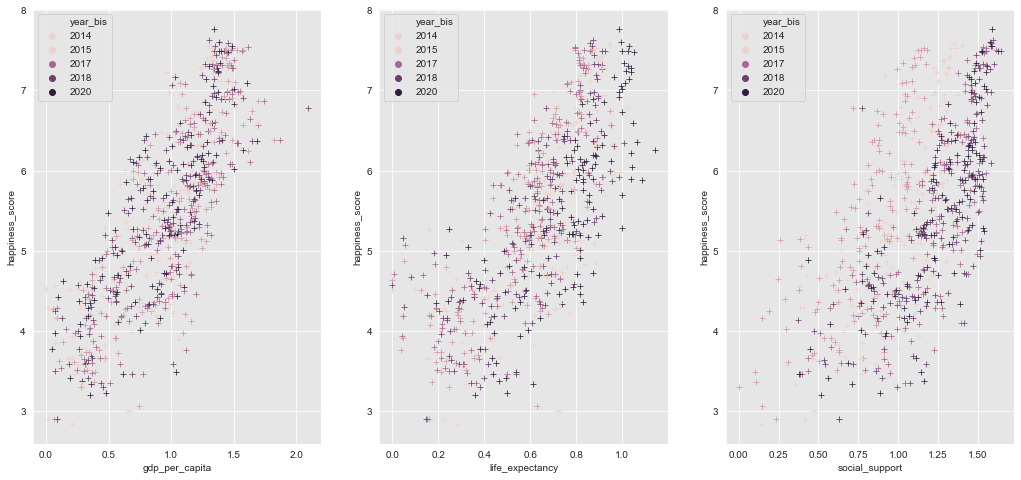

In [37]:
plt.figure(figsize=(30,8))
df["year_bis"] = df["year"].apply(lambda x: str(x))

i = 151 # subplot initial position
for factor in ['gdp_per_capita', 'life_expectancy', 'social_support']:
    plt.subplot(i)
    #plt.scatter(df['happiness_score'], df[factor], c = 'year')
    sns.set_palette("bright")
    plot = sns.scatterplot(x=factor, y='happiness_score', data=df, marker='+', hue="year_bis")
    i+=1

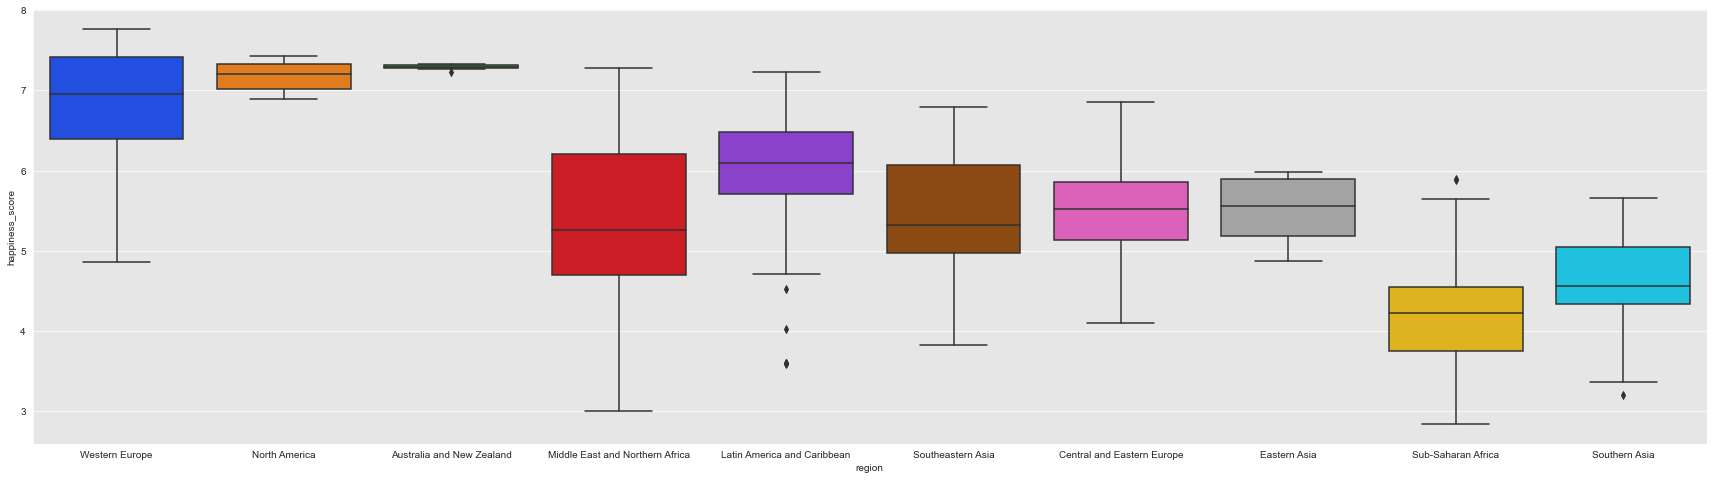

In [38]:
plt.figure(figsize=(30,8))
sns.boxplot(x="region", y="happiness_score", data=df, dodge=True)

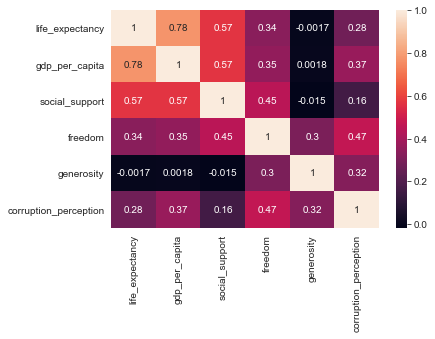

In [39]:
corr_matrix=df[l_factors].corr()


sns.heatmap(corr_matrix, annot = True)

In [40]:
df["happiness_level"]=pd.qcut(df["happiness_score"], 4, labels=["low", "low-mid", "top-mid", "top"])

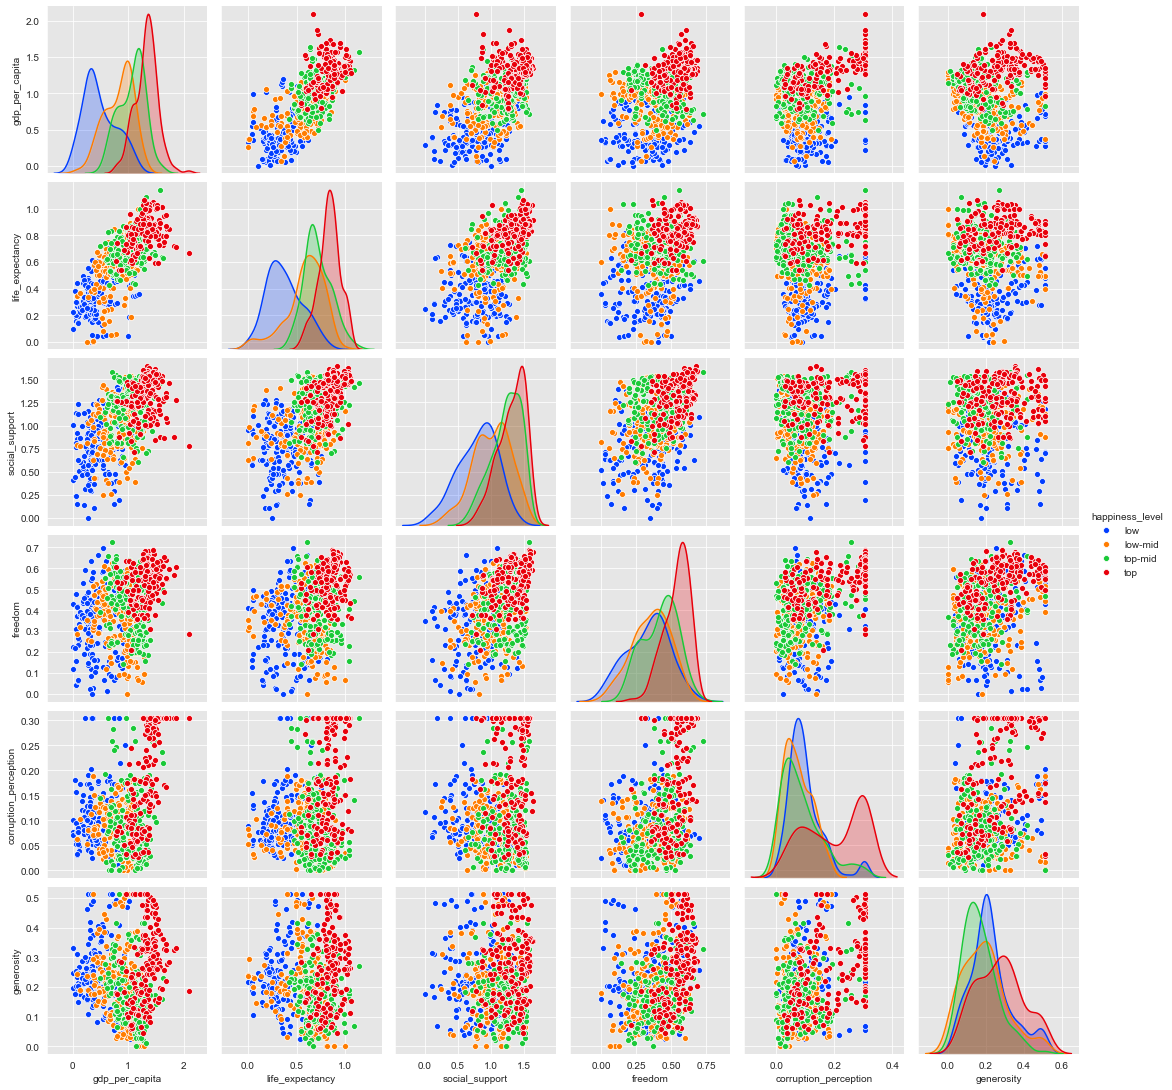

In [41]:
sns.pairplot(df[['gdp_per_capita', 'life_expectancy', 'social_support','freedom','corruption_perception','generosity', 'happiness_level']],
             hue="happiness_level")

In [42]:
df_high_corr = df[df["corruption_perception"]>=60]

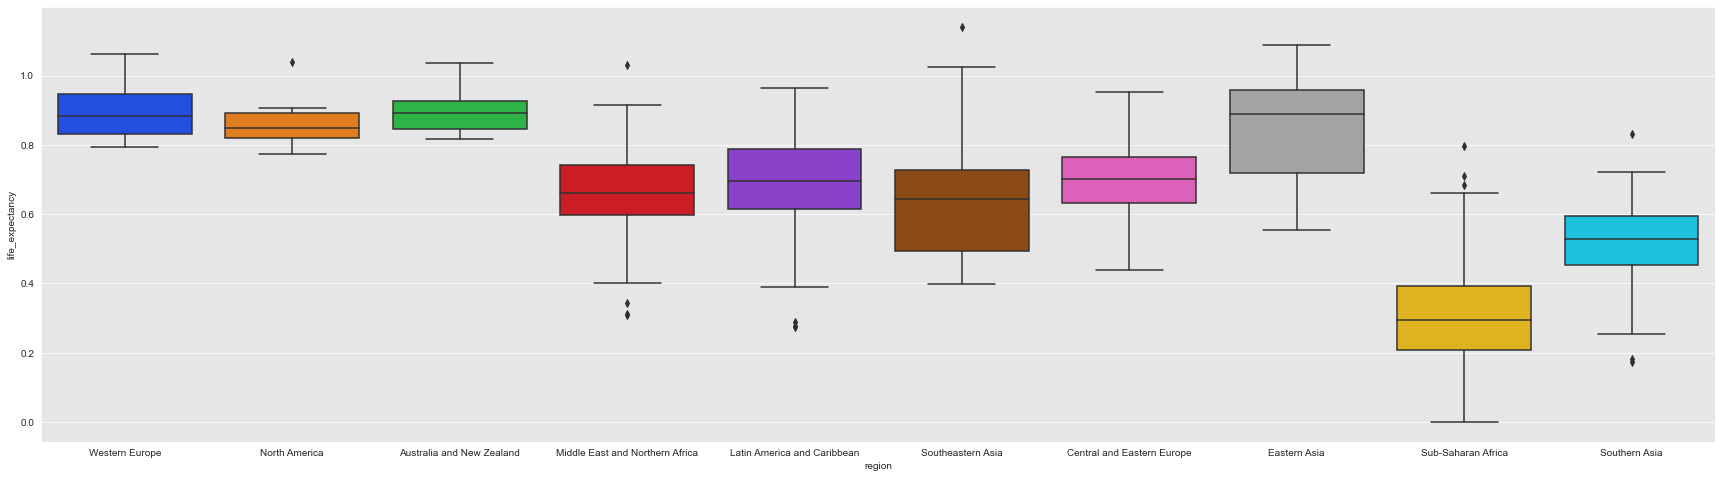

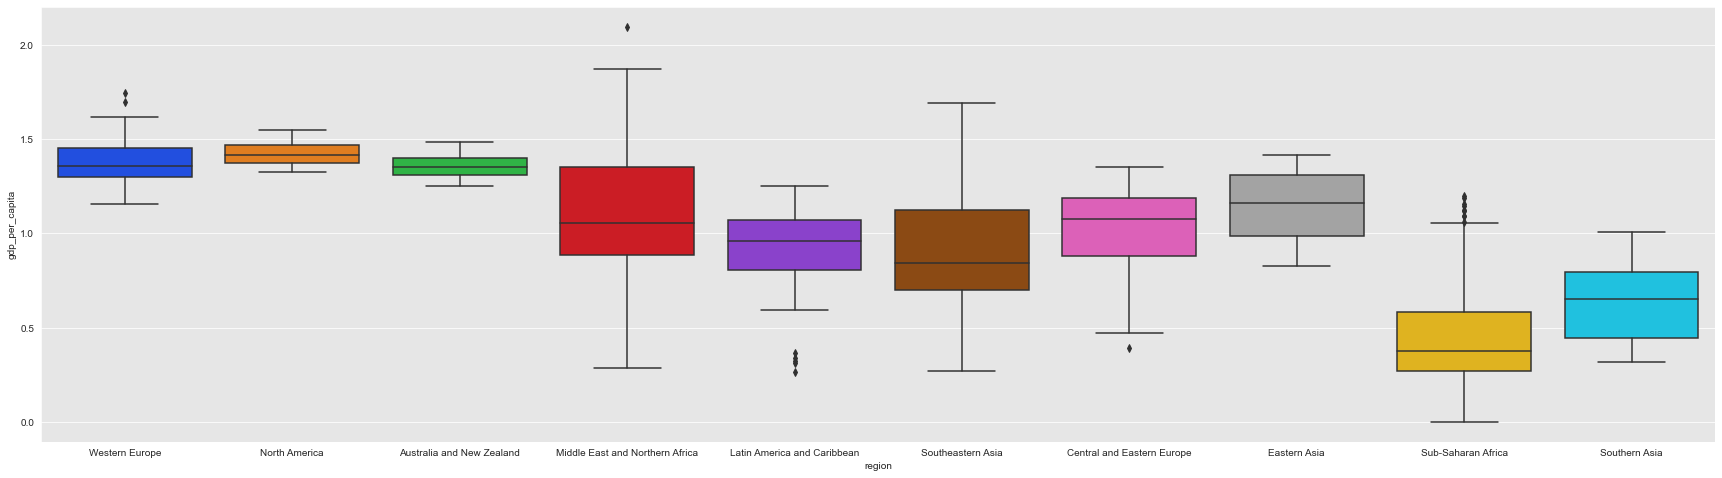

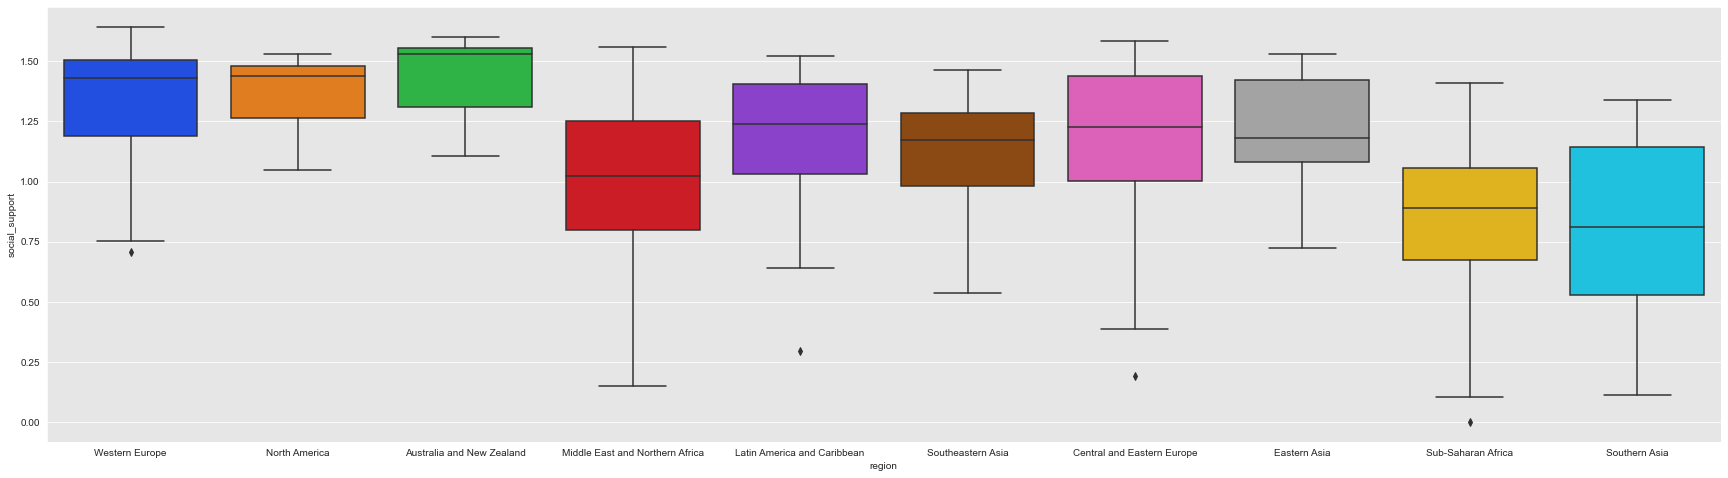

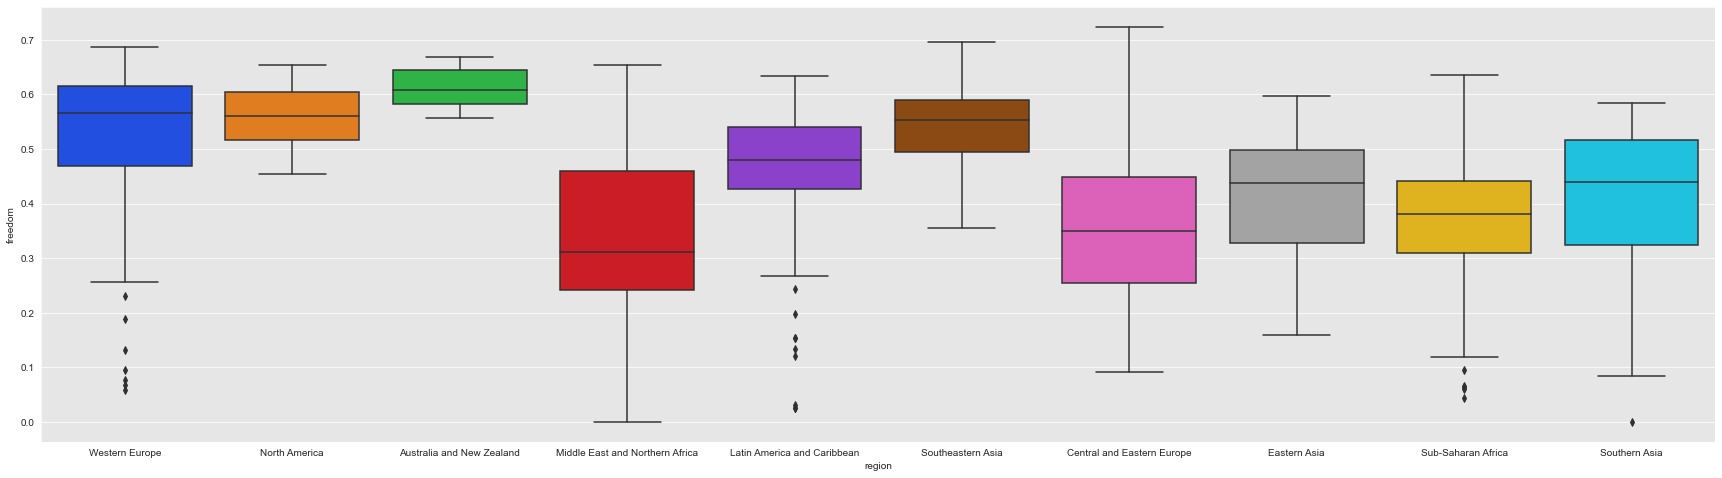

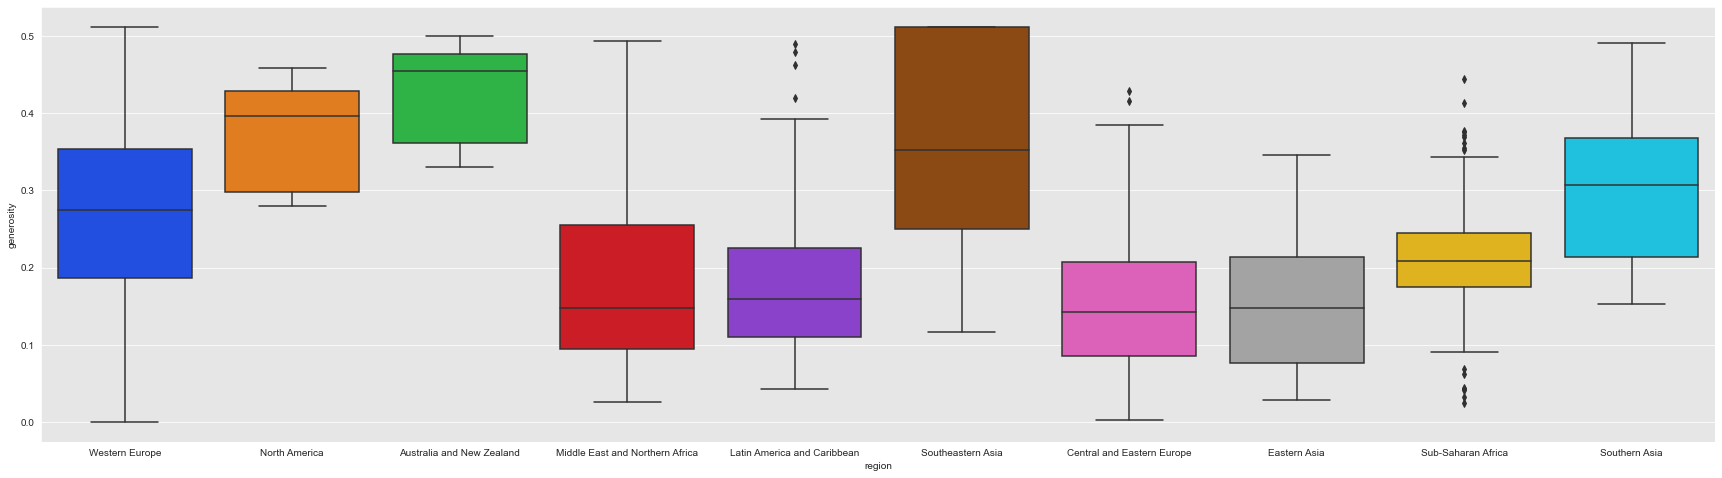

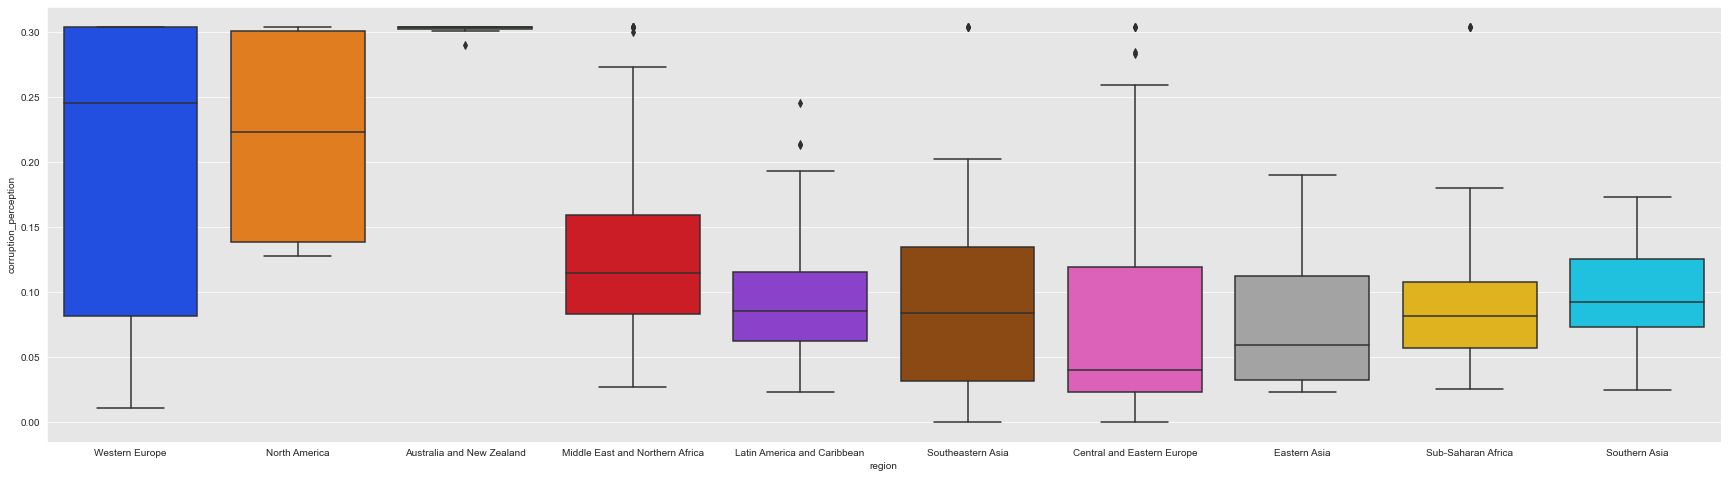

In [43]:
for col in l_factors:
    plt.figure(figsize=(30,8))
    sns.boxplot(x="region", y=col, data=df, dodge=True)